In [ ]:
from google.colab import files


uploaded = files.upload()

Saving sample_data.xls to sample_data.xls


In [ ]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio 
pio.templates


Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

In [ ]:
!pip3 install --upgrade xlrd

In [ ]:
df = pd.read_excel('sample_data.xls', parse_dates=['date'], engine = 'xlrd',
                   usecols = ['date','open','high','low','close','volume'])

In [ ]:
df.head()

,date,open,high,low,close,volume
0,2022-01-03 09:15:00,252.70,254.25,252.35,252.60,319790
1,2022-01-03 09:30:00,252.60,253.65,251.75,252.80,220927
2,2022-01-03 09:45:00,252.95,254.90,252.30,252.85,526445
3,2022-01-03 10:00:00,252.85,253.15,252.40,252.55,280414
4,2022-01-03 10:15:00,252.55,253.10,252.25,252.80,112875


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2000 non-null   datetime64[ns]
 1   open    2000 non-null   float64       
 2   high    2000 non-null   float64       
 3   low     2000 non-null   float64       
 4   close   2000 non-null   float64       
 5   volume  2000 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 93.9 KB


In [ ]:
#Adding separate month column.

import calendar

df['month']=pd.DatetimeIndex(df['date']).month
df['month'] = list(map(lambda x: calendar.month_name[x], df['month']))
df.month

0       January
1       January
2       January
3       January
4       January
         ...   
1995      April
1996      April
1997      April
1998      April
1999      April
Name: month, Length: 2000, dtype: object

In [ ]:
df["date"] = pd.to_datetime(df["date"]).dt.date

In [ ]:
df.set_index('date')
df.head(3)

,date,open,high,low,close,volume,month
0,2022-01-03,252.70,254.25,252.35,252.60,319790,January
1,2022-01-03,252.60,253.65,251.75,252.80,220927,January
2,2022-01-03,252.95,254.90,252.30,252.85,526445,January


In [ ]:
trend = px.line(df, x = 'date', y = ['open','close','high','low'], template= 'presentation',title = 'Closing Price',
               width=900, height=400)
trend.show()


### 1st observation: After a dip from Feb 16, there is a upward trend from March 7th , so whoever invested in this time earned a generous profit.

In [ ]:
volume = px.line(df, x = 'date', y = 'volume' , template= 'gridon',title = 'Volume Traded',
               width=900, height=400)
volume.show()

### 2nd observation: We can clearly see that April 8th, March 15th and January 24th are the dates with 'Most traded volumes'.

In [ ]:
# Max volume traded data 

max = df.iloc[df.volume.argmax()]
print(max)

date      2022-04-08
open           313.0
high          326.75
low           308.05
close         325.15
volume       8346762
month          April
Name: 1650, dtype: object


In [ ]:
df.describe()

,open,high,low,close,volume
count,2000.000000,2000.000000,2000.000000,2000.000000,2.000000e+03
mean,304.072050,305.112750,303.062375,304.087500,3.995450e+05
std,23.117987,23.129187,23.076869,23.100806,4.938786e+05
min,249.850000,250.150000,249.000000,249.800000,2.229300e+04
25%,293.187500,294.125000,292.112500,293.250000,1.471022e+05
50%,306.525000,307.975000,305.550000,306.675000,2.484240e+05
75%,321.700000,322.500000,320.700000,321.650000,4.841755e+05
max,341.100000,344.600000,340.300000,341.050000,8.346762e+06


From above, we can get the idea of distribution of data and min, max and mean of open-close and high-low price.

# Total money traded

In [ ]:
df['total_traded'] = df.open * df.volume

In [ ]:
df.head()

,date,open,high,low,close,volume,month,total_traded
0,2022-01-03,252.70,254.25,252.35,252.60,319790,January,8.081093e+07
1,2022-01-03,252.60,253.65,251.75,252.80,220927,January,5.580616e+07
2,2022-01-03,252.95,254.90,252.30,252.85,526445,January,1.331643e+08
3,2022-01-03,252.85,253.15,252.40,252.55,280414,January,7.090268e+07
4,2022-01-03,252.55,253.10,252.25,252.80,112875,January,2.850658e+07


In [ ]:
total_trade = px.line(df, x = 'date', y = 'total_traded' , template= 'ggplot2',title = 'Total Money Traded',
               width=900, height=400)
total_trade.show()

### 3rd observation: We can see similarity with our previous plot and the clarity that on April 8th Money invested in sharemarket is more than other dates.

### Probable reasons: Economic factors, Effect of supply-demand, Market sentiment.

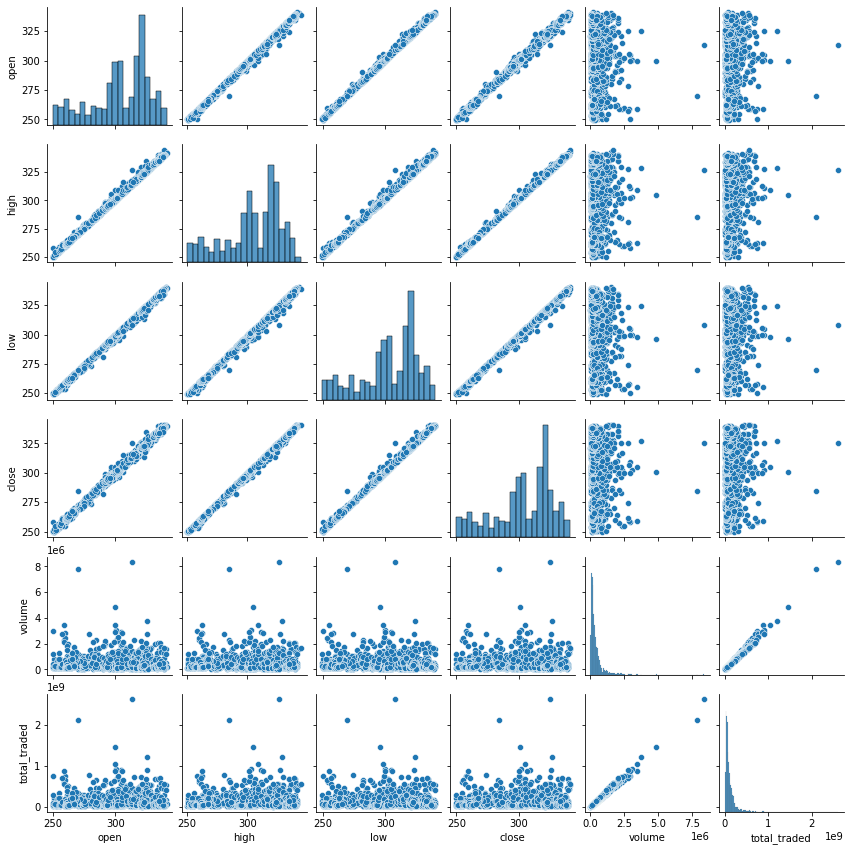

In [ ]:
sns.pairplot(df,height=2)

In [ ]:
df.corr()

,open,high,low,close,volume,total_traded
open,1.000000,0.998649,0.999028,0.997943,-0.075930,-0.012488
high,0.998649,1.000000,0.998160,0.999121,-0.044327,0.019035
low,0.999028,0.998160,1.000000,0.998756,-0.088975,-0.025854
close,0.997943,0.999121,0.998756,1.000000,-0.059224,0.003942
volume,-0.075930,-0.044327,-0.088975,-0.059224,1.000000,0.994931
total_traded,-0.012488,0.019035,-0.025854,0.003942,0.994931,1.000000


We can see that the high, low, open and close values are Positively correlated with each others.

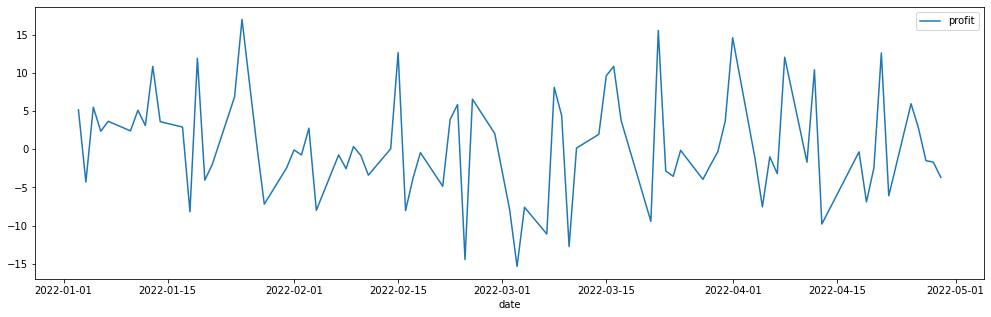

In [ ]:
#Total profit per day

df['profit'] = df['close'] - df['open']

profit_day = df.groupby(df.date).agg({'profit': 'sum'}).plot(figsize = (17,5))

### 4th observation: Profit fluctuates a lot daywise.

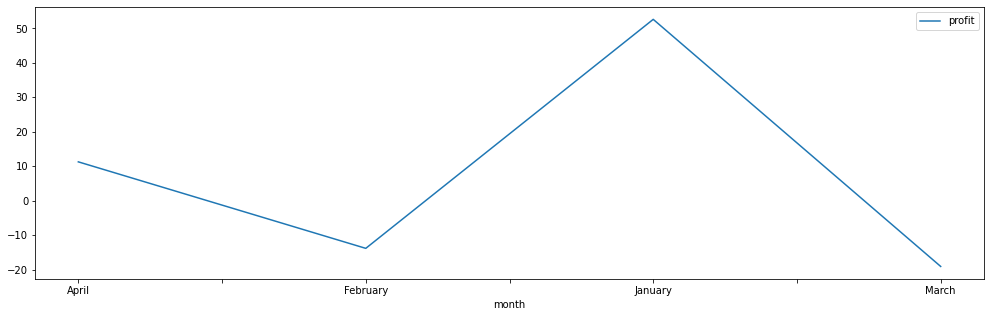

In [ ]:
profit_month = df.groupby(df.month).agg({'profit': 'sum'}).plot(figsize = (17,5))

### 5th observation: We can observe that Max profit gain is around the month of January.

In [ ]:
## Using Candlestick chart which is appropriate to visualize better anything regarding Share market

fig = go.Figure(data=[go.Candlestick(x=df['date'],
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close'])])

fig.show()

### 6th observation: We can observe the Gain and Loss over the months and it is clearly visible that from March 13th the market took a uprising after February

# Percentage Gain/Loss Compared to Previous Day

In [ ]:
df['returns'] = (df.close/ df['close'].shift(1))-1

In [ ]:
df.head()

,date,open,high,low,close,volume,month,total_traded,profit,returns
0,2022-01-03,252.70,254.25,252.35,252.60,319790,January,8.081093e+07,-0.10,NaN
1,2022-01-03,252.60,253.65,251.75,252.80,220927,January,5.580616e+07,0.20,0.000792
2,2022-01-03,252.95,254.90,252.30,252.85,526445,January,1.331643e+08,-0.10,0.000198
3,2022-01-03,252.85,253.15,252.40,252.55,280414,January,7.090268e+07,-0.30,-0.001186
4,2022-01-03,252.55,253.10,252.25,252.80,112875,January,2.850658e+07,0.25,0.000990


[Text(0.5, 1.0, 'Volatility vs Stability')]

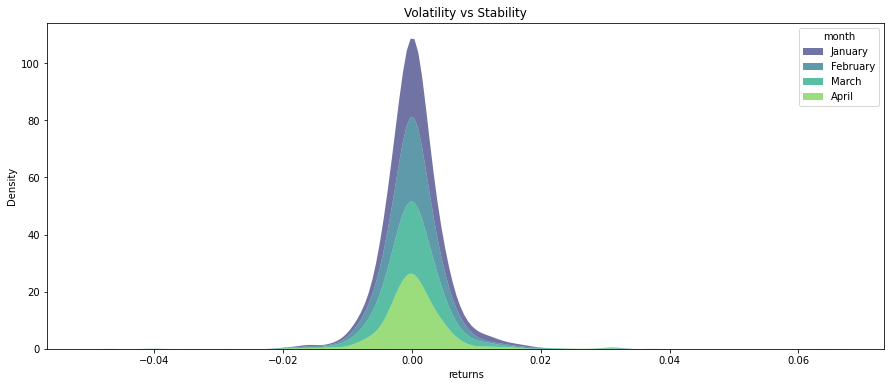

In [150]:
# to check the volatility of the stock

plt.subplots(figsize=(15, 6))
kde = sns.kdeplot(data=df, x="returns", hue="month", multiple="stack",
                  palette = 'viridis', fill = True, linewidth = 0)
kde.set(title = 'Volatility vs Stability')

### 7th observatioin: More the distribution around the mean, more the stability of the stock returns

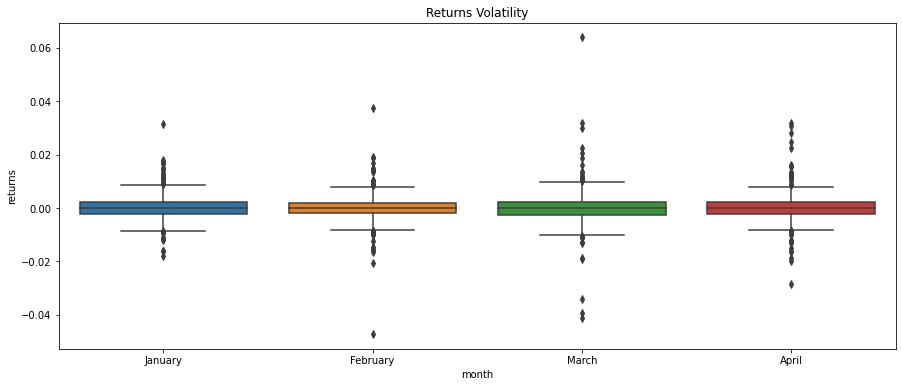

In [ ]:
plt.subplots(figsize=(15, 6))
box = sns.boxplot(x="month", y="returns", data=df).set(title = 'Returns Volatility')

### 8th observation: Returns volatility is more in March than others.

# Cumulative Return

In [ ]:
df['cumulative_return'] = (1 + df.returns).cumprod()

In [ ]:
df.head()

,date,open,high,low,close,volume,month,total_traded,profit,returns,cumulative_return
0,2022-01-03,252.70,254.25,252.35,252.60,319790,January,8.081093e+07,-0.10,NaN,NaN
1,2022-01-03,252.60,253.65,251.75,252.80,220927,January,5.580616e+07,0.20,0.000792,1.000792
2,2022-01-03,252.95,254.90,252.30,252.85,526445,January,1.331643e+08,-0.10,0.000198,1.000990
3,2022-01-03,252.85,253.15,252.40,252.55,280414,January,7.090268e+07,-0.30,-0.001186,0.999802
4,2022-01-03,252.55,253.10,252.25,252.80,112875,January,2.850658e+07,0.25,0.000990,1.000792


In [153]:
cum_return = px.line(df, x = 'date', y = 'cumulative_return', template= 'gridon',title = 'Cumulative Return vs Time',
               width=900, height=400)
cum_return.show()